<a href="https://colab.research.google.com/github/sreemathymahes/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/Sreemathy_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1


Train model on MNIST dataset trying different architectures and hyperparameters, and test it on a custom dataset.

Import the necessary packages for the model.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

The model is a sequential neural network model using TensorFlow's Keras API.


The firts layer takes an input shape of (28, 28) and flattens it into a 1D array of size 28 * 28 = 784. It's often used to convert 2D data, such as images, into a format suitable for fully connected layers.
The model architecture is designed for image classification tasks where the input 28x28 pixel images and output probabilities for 10 different classes.

Dense layer (layers_dense): This is a fully connected layer with 512 neurons and ReLU (Rectified Linear Unit) activation. It's a hidden layer in your neural network and is often used for feature extraction and transformation.

Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of the input units to 0 during each training step.

The output layer with 10 neurons and softmax activation is used for multi-class classification, and softmax activation produces probability scores for each class.

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='layers_flatten'),
    tf.keras.layers.Dense(512, activation='relu', name='layers_dense'),
    tf.keras.layers.Dropout(0.2, name='layers_dropout'),
    tf.keras.layers.Dense(10, activation='softmax', name='layers_dense_2')
  ])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The model is compiled and trained using appropriate loss and optimizer in this case adam optimizer. Adam is known for its efficiency and effectiveness in training neural networks. It adapts the learning rates for each parameter during training.
sparse_categorical_crossentropy is suitable for multi-class classification problems where the target labels are integers (e.g., class labels). It calculates the cross-entropy loss between the true labels and the predicted probabilities.

In [ ]:
history=model.fit(x=x_train,
          y=y_train,
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 2.7523 - accuracy: 0.8775 - val_loss: 0.3968 - val_accuracy: 0.9212
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4410 - accuracy: 0.9088 - val_loss: 0.3434 - val_accuracy: 0.9277
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4156 - accuracy: 0.9105 - val_loss: 0.3120 - val_accuracy: 0.9324
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3895 - accuracy: 0.9145 - val_loss: 0.3301 - val_accuracy: 0.9380
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3656 - accuracy: 0.9211 - val_loss: 0.3162 - val_accuracy: 0.9374
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3411 - accuracy: 0.9264 - val_loss: 0.3144 - val_accuracy: 0.9436
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3305 - accuracy: 0.9291 - val_loss: 0.3248 - val

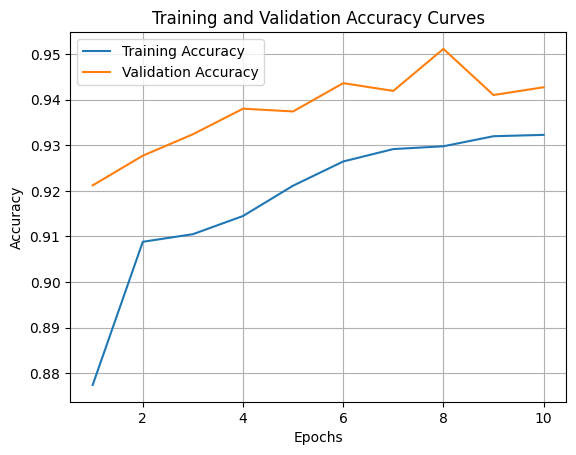

In [ ]:
import matplotlib.pyplot as plt

# Extract training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy curves
plt.plot(range(1, 11), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 11), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()
plt.grid(True)
plt.show()

The Training and the validation accuracy increases with the epochs

### Overfitting

The models is again trained with 25 and 40 epochs to see overfitting

In [ ]:
# Train the model for 25 epochs
history_15 = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))



Epoch 1/25
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3113 - accuracy: 0.9359 - val_loss: 0.3322 - val_accuracy: 0.9454
Epoch 2/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3033 - accuracy: 0.9376 - val_loss: 0.3270 - val_accuracy: 0.9460
Epoch 3/25
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2991 - accuracy: 0.9377 - val_loss: 0.4100 - val_accuracy: 0.9490
Epoch 4/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2806 - accuracy: 0.9411 - val_loss: 0.3399 - val_accuracy: 0.9444
Epoch 5/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2864 - accuracy: 0.9417 - val_loss: 0.3884 - val_accuracy: 0.9491
Epoch 6/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2991 - accuracy: 0.9412 - val_loss: 0.4025 - val_accuracy: 0.9496
Epoch 7/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2815 - accuracy: 0.9436 - val_loss: 0.4538 - v

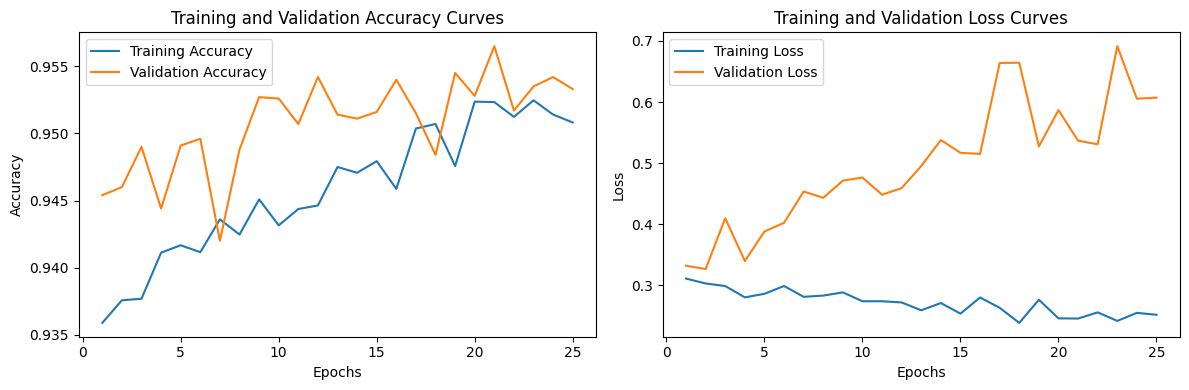

In [ ]:


# Extract training history
train_accuracy = history_15.history['accuracy']
val_accuracy = history_15.history['val_accuracy']
train_loss = history_15.history['loss']
val_loss = history_15.history['val_loss']

# Plot accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 26), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 26), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()

# Plot loss curves
plt.subplot(1, 2, 2)
plt.plot(range(1, 26), train_loss, label='Training Loss')
plt.plot(range(1, 26), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()

plt.tight_layout()
plt.show()


From the Accuracy plot overfitting can be observed after 17th epoch

Now increasing the epochs to 40.

In [ ]:
# Train the model for 40 epochs
history_40 = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

Epoch 1/40
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2416 - accuracy: 0.9507 - val_loss: 0.6395 - val_accuracy: 0.9527
Epoch 2/40
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2684 - accuracy: 0.9507 - val_loss: 0.6424 - val_accuracy: 0.9517
Epoch 3/40
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2441 - accuracy: 0.9542 - val_loss: 0.5975 - val_accuracy: 0.9492
Epoch 4/40
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2403 - accuracy: 0.9535 - val_loss: 0.6792 - val_accuracy: 0.9532
Epoch 5/40
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2410 - accuracy: 0.9537 - val_loss: 0.6399 - val_accuracy: 0.9559
Epoch 6/40
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2561 - accuracy: 0.9531 - val_loss: 0.6354 - val_accuracy: 0.9554
Epoch 7/40
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2301 - accuracy: 0.9541 - val_loss: 0.7438 - val

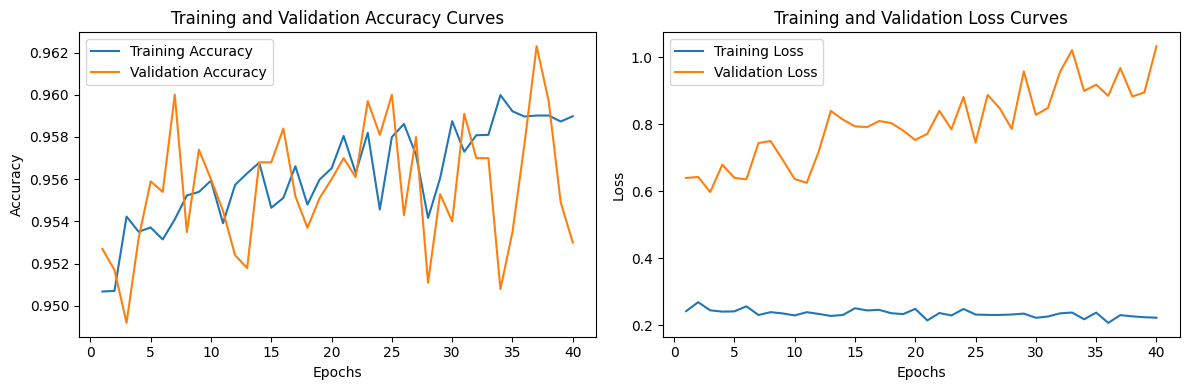

In [ ]:
# Extract training history
train_accuracy = history_40.history['accuracy']
val_accuracy = history_40.history['val_accuracy']
train_loss = history_40.history['loss']
val_loss = history_40.history['val_loss']

# Plot accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 41), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 41), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()

# Plot loss curves
plt.subplot(1, 2, 2)
plt.plot(range(1, 41), train_loss, label='Training Loss')
plt.plot(range(1, 41), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()

plt.tight_layout()
plt.show()


The left plot shows the training and validation accuracy curves. Overfitting can be detected as the training accuracy and the validation accuracy follows the same trend.

The right plot shows the training and validation loss curves. Overfitting can be observed at epoch 20 as the training loss continues to decrease while the validation loss starts to increase.

### Configuration change

The model configuration are changed and trainned for 10 epochs. The final accuracy were plotted.

Configuration 1: Increase the number of neurons in the hidden layer

In [ ]:
model_config1=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='layers_flatten'),
    tf.keras.layers.Dense(768, activation='relu', name='layers_dense'), #incresing the number of neurons in the hidden layer
    tf.keras.layers.Dropout(0.2, name='layers_dropout'),
    tf.keras.layers.Dense(10, activation='softmax', name='layers_dense_2')
  ])

In [ ]:
model_config1.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

history_config1 = model_config1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 22s 12ms/step - loss: 3.0635 - accuracy: 0.8930 - val_loss: 0.4914 - val_accuracy: 0.9142
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4736 - accuracy: 0.9124 - val_loss: 0.5081 - val_accuracy: 0.9140
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4591 - accuracy: 0.9133 - val_loss: 0.3183 - val_accuracy: 0.9334
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4142 - accuracy: 0.9170 - val_loss: 0.3171 - val_accuracy: 0.9353
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3981 - accuracy: 0.9210 - val_loss: 0.3532 - val_accuracy: 0.9429
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3617 - accuracy: 0.9275 - val_loss: 0.3194 - val_accuracy: 0.9439
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3619 - accuracy: 0.9278 - val_loss: 0.4031 - val_accura

Configuration 2:
Add new hidden layer to the model

In [ ]:
model_config2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),  # Add another hidden layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

model_config2.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

history_config2 = model_config2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 2.2700 - accuracy: 0.8184 - val_loss: 0.5005 - val_accuracy: 0.8929
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5343 - accuracy: 0.8831 - val_loss: 0.3062 - val_accuracy: 0.9226
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3541 - accuracy: 0.9100 - val_loss: 0.2134 - val_accuracy: 0.9453
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2826 - accuracy: 0.9278 - val_loss: 0.1858 - val_accuracy: 0.9503
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2762 - accuracy: 0.9311 - val_loss: 0.1924 - val_accuracy: 0.9520
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2534 - accuracy: 0.9365 - val_loss: 0.1719 - val_accuracy: 0.9582
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2367 - accuracy: 0.9404 - val_loss: 0.1852 - val_ac

#### Configuration:3
 Increase dropout rate

In [ ]:
model_config3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Increase dropout rate
    tf.keras.layers.Dense(10)
])

model_config3.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

history_config3 = model_config3.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 3.5077 - accuracy: 0.8013 - val_loss: 0.4760 - val_accuracy: 0.8993
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.7094 - accuracy: 0.8307 - val_loss: 0.3709 - val_accuracy: 0.9107
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6426 - accuracy: 0.8454 - val_loss: 0.3875 - val_accuracy: 0.9212
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6294 - accuracy: 0.8516 - val_loss: 0.3799 - val_accuracy: 0.9198
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5995 - accuracy: 0.8616 - val_loss: 0.3223 - val_accuracy: 0.9283
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6040 - accuracy: 0.8622 - val_loss: 0.3690 - val_accuracy: 0.9331
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5963 - accuracy: 0.8640 - val_loss: 0.3366 - val_a

Plotting the results of the above configurations.

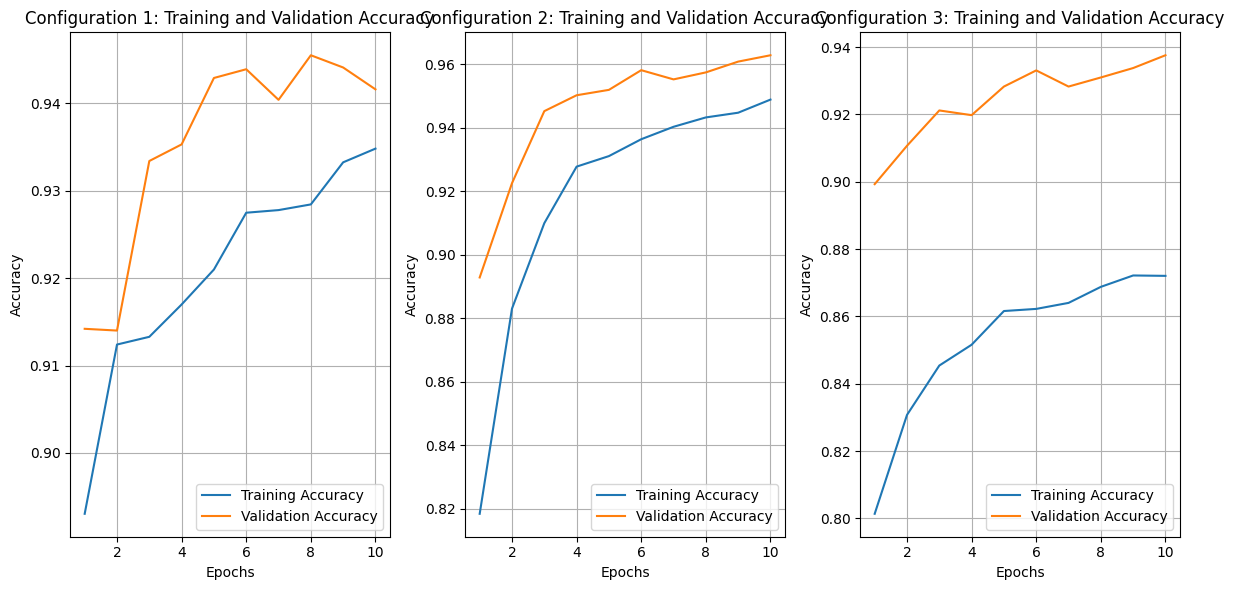

In [ ]:
# Plot accuracy curves for each configuration
plt.figure(figsize=(12, 6))

# Configuration 1
plt.subplot(1, 3, 1)
plt.plot(range(1, 11), history_config1.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, 11), history_config1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Configuration 1: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Configuration 2
plt.subplot(1, 3, 2)
plt.plot(range(1, 11), history_config2.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, 11), history_config2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Configuration 2: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Configuration 3
plt.subplot(1, 3, 3)
plt.plot(range(1, 11), history_config3.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, 11), history_config3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Configuration 3: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


The plots above shows the accuracy acquired from three configuratons. Increasing the neurons has given a better accuracy than the previous results. Also, from the above plots its clear that the increasing the number of hidden layers in the model improve the validation accuracy (>0.96).
In the third configuration, increasing the dropout rate has decreased both the validation and training accuracy of the model.


## Creating the Dataset

New dataset similar to the mnist dataset with 3 images per label is created and added to the google drive folder. The the drive is mounted and the images are added as the test data.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load custom images from Google Drive
custom_images = []
custom_labels = []
base_folder_path = '/content/drive/MyDrive/TME6015/Assignment1'
for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)
    print(folder_path)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
          print('filename', filename)
          if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.jpg'):
              img_path = os.path.join(folder_path, filename)
              img = Image.open(img_path).convert('L')  # convert image to grayscale
              #img = Image.open(img_path)
              img = img.resize((28, 28))  # resize image to match MNIST data
              img_array = np.array(img)
              custom_images.append(img_array)
              custom_labels.append(int(folder_name))  # use folder name as label

# Convert the list of custom images and labels to numpy arrays
custom_images = np.array(custom_images)
custom_labels = np.array(custom_labels)

# Preprocess the custom images
custom_images = custom_images / 255.0

/content/drive/MyDrive/TME6015/Assignment1/0
filename PXL_20231001_180349183.jpg
filename PXL_20231001_180357283.jpg
filename PXL_20231001_180359975.jpg
/content/drive/MyDrive/TME6015/Assignment1/1
filename PXL_20231001_180509570.jpg
filename PXL_20231001_180511818.jpg
filename PXL_20231001_180516192.jpg
/content/drive/MyDrive/TME6015/Assignment1/7
filename PXL_20231001_180407175~2.jpg
filename PXL_20231001_180410155~2.jpg
filename PXL_20231001_180405457~2.jpg
/content/drive/MyDrive/TME6015/Assignment1/2
filename PXL_20231001_180435320~2.jpg
filename PXL_20231001_180434052~2.jpg
filename PXL_20231001_180434052~3.jpg
/content/drive/MyDrive/TME6015/Assignment1/3
filename PXL_20231001_180424020~2.jpg
filename PXL_20231001_180426462~2.jpg
filename PXL_20231001_180420494~2.jpg
/content/drive/MyDrive/TME6015/Assignment1/4
filename PXL_20231001_180536570~2.jpg
filename PXL_20231001_180538444~2.jpg
filename PXL_20231001_180542997~2.jpg
/content/drive/MyDrive/TME6015/Assignment1/5
filename PXL_

In [6]:
display_image = custom_images[0] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)

# Display the image
img

In [7]:
# Add the custom images and labels to the original MNIST dataset
x_test_new = custom_images
y_test_new = custom_labels



In [8]:
display_image = x_test_new[-1] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)
img

In [9]:
model_new=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='layers_flatten'),
    tf.keras.layers.Dense(512, activation='relu', name='layers_dense'),
    tf.keras.layers.Dropout(0.2, name='layers_dropout'),
    tf.keras.layers.Dense(10, activation='softmax', name='layers_dense_2')
  ])

model_new.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history_new=model_new.fit(x_train,
          y_train,
          epochs=10,
          validation_data=(x_test_new, y_test_new))

#model_config3.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 2.5906 - accuracy: 0.8775 - val_loss: 2.3088 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4529 - accuracy: 0.9058 - val_loss: 2.3453 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4126 - accuracy: 0.9096 - val_loss: 2.4065 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3843 - accuracy: 0.9163 - val_loss: 2.4816 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3721 - accuracy: 0.9196 - val_loss: 2.5251 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3598 - accuracy: 0.9234 - val_loss: 2.5680 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3544 - accuracy: 0.9255 - val_loss: 2.5977 - val_ac

In summary, this training log indicates that the model achieved high training accuracy (93.37%) but performed poorly on the validation dataset (10% accuracy). This discrepancy between training and validation accuracy suggests overfitting, where the model may have memorized the training data rather than generalizing well to new data. Further optimization or regularization techniques may be needed to improve the model's performance on unseen data.


Setting a threshold for the pixel value as 150 to test the accuracy.

In [ ]:
# Load custom images from Google Drive
custom_images1 = []
custom_labels1 = []
base_folder_path = '/content/drive/MyDrive/TME6015/Assignment1'
for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)
    print(folder_path)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
          print('filename', filename)
          if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.jpg'):
              img_path = os.path.join(folder_path, filename)
              img = Image.open(img_path).convert('L')  # convert image to grayscale
              #img = Image.open(img_path)
              img = img.resize((28, 28))  # resize image to match MNIST data
              #img = img.rotate(-90)
              threshold = 210
              img = img.point(lambda p: p > threshold and 255)
              img_array = np.array(img)
              custom_images1.append(img_array)
              custom_labels1.append(int(folder_name))  # use folder name as label

# Convert the list of custom images and labels to numpy arrays
custom_images1 = np.array(custom_images1)
custom_labels1 = np.array(custom_labels1)

# Preprocess the custom images
custom_images1 = custom_images1 / 255.0


display_image = custom_images1[0] * 255

# Convert the image data to uint8
display_image = display_image.astype(np.uint8)

# Create a PIL image
img = Image.fromarray(display_image)

# Display the image
img



/content/drive/MyDrive/TME6015/Assignment1/0
filename PXL_20231001_180359975.jpg
filename PXL_20231001_180357283.jpg
filename PXL_20231001_180349183.jpg
/content/drive/MyDrive/TME6015/Assignment1/1
filename PXL_20231001_180516192.jpg
filename PXL_20231001_180511818.jpg
filename PXL_20231001_180509570.jpg
/content/drive/MyDrive/TME6015/Assignment1/7
filename PXL_20231001_180410155~2.jpg
filename PXL_20231001_180407175~2.jpg
filename PXL_20231001_180405457~2.jpg
/content/drive/MyDrive/TME6015/Assignment1/2
filename PXL_20231001_180435320~2.jpg
filename PXL_20231001_180434052~3.jpg
filename PXL_20231001_180434052~2.jpg
/content/drive/MyDrive/TME6015/Assignment1/3
filename PXL_20231001_180426462~2.jpg
filename PXL_20231001_180424020~2.jpg
filename PXL_20231001_180420494~2.jpg
/content/drive/MyDrive/TME6015/Assignment1/4
filename PXL_20231001_180542997~2.jpg
filename PXL_20231001_180538444~2.jpg
filename PXL_20231001_180536570~2.jpg
/content/drive/MyDrive/TME6015/Assignment1/5
filename PXL_

In [ ]:
x_test1 = custom_images1
y_test1 = custom_labels1


In [ ]:
model_new.evaluate(x_test1, y_test1 )

1/1 [==============================] - 0s 31ms/step - loss: 2.3296 - accuracy: 0.0333


[2.329641103744507, 0.03333333507180214]

The accuracy of the model has decreased.